In [1]:
import os
import os.path as osp
import json
import cv2
import numpy as np
import copy
import json

In [2]:
from dataset_parsers import CMUPanoticParser, MHPParser, GANeratedParser
data_root = '/home/zg/wdir/Datasets/GestureDet_dataset/RealHands/data'
parser = GANeratedParser(data_root=data_root)
print(len(parser.samples))

collecting user user06_03 ...


100%|██████████| 1207/1207 [00:00<00:00, 4108.47it/s]


collecting user user04_01 ...


100%|██████████| 4019/4019 [00:01<00:00, 2995.54it/s]


collecting user user05_01 ...


100%|██████████| 2506/2506 [00:00<00:00, 3889.42it/s]


collecting user user01_static ...


100%|██████████| 7179/7179 [00:01<00:00, 4403.69it/s]


collecting user user02 ...


100%|██████████| 5011/5011 [00:00<00:00, 6966.59it/s]


collecting user user07 ...


100%|██████████| 5380/5380 [00:01<00:00, 5291.71it/s]


collecting user user04_02 ...


100%|██████████| 1203/1203 [00:00<00:00, 7314.27it/s]


collecting user user06_02 ...


100%|██████████| 2216/2216 [00:00<00:00, 8367.59it/s]


collecting user user06_01 ...


100%|██████████| 1726/1726 [00:00<00:00, 5223.16it/s]


collecting user user01 ...


100%|██████████| 6238/6238 [00:00<00:00, 10019.50it/s]


collecting user user05_02 ...


100%|██████████| 2511/2511 [00:00<00:00, 7302.93it/s]


collecting user user07_static ...


100%|██████████| 5125/5125 [00:00<00:00, 11685.18it/s]


collecting user user03 ...


100%|██████████| 5012/5012 [00:00<00:00, 12577.70it/s]

46966


In [3]:
from utils.vis import PLTPoltter, draw_joints_on_img

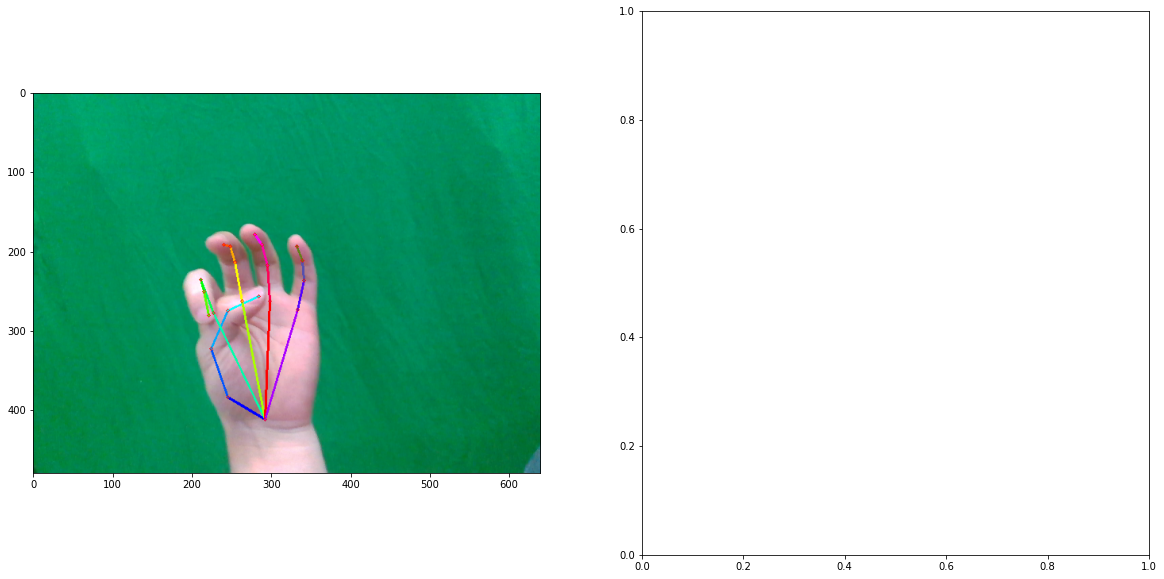

In [4]:
# vis samples from single dataset parser
sample = parser.samples[921]
# print(sample)

img_path = sample['img_path']
bbox = sample['bbox']
joints = sample['joints']

img = cv2.imread(img_path)
img = draw_joints_on_img(img, joints, show_joint_id=False)

plt_poltter = PLTPoltter(ax_size=(1, 2), figsize=(20, 10))
plt_poltter.plt_show_cv2_img(img, 0) 

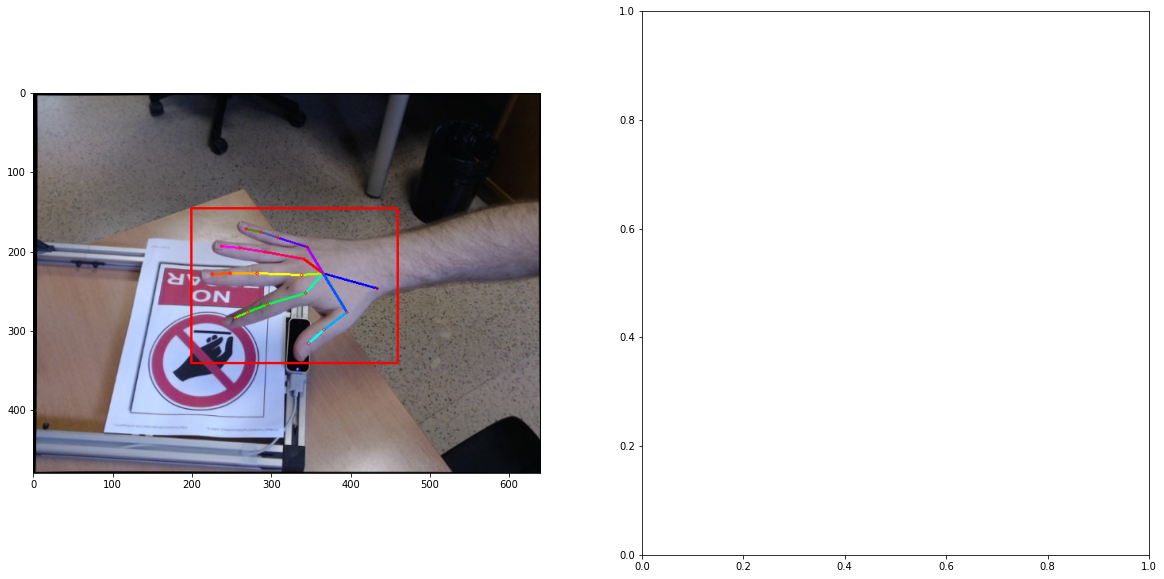

In [5]:
# after running `handpose_dataset_aggregator.py`, we test the generated json file
train_json = './train.json'
with open(train_json, 'r') as f:
    data_info = json.load(f)
    samples = data_info['samples']

index = 0
img = cv2.imread(samples[index]['img_path'])
bbox = samples[index]['bbox']
joints = samples[index]['joints']
dataset_name = samples[index]['dataset_name']

xmin, ymin, xmax, ymax = bbox
cv2.rectangle(img, (xmin, ymin), (xmax, ymax), color=(0, 0, 255), thickness=2)
# for i, pt in enumerate(joints):
#     if dataset_name == 'MHP' and i == 1:  # mask the uncommon joint in MHP dataset
#         continue
#     x, y = pt
#     cv2.circle(img, (int(x), int(y)), radius=1, color=(0, 0, 255), thickness=5)
img = draw_joints_on_img(img, joints, show_joint_id=False, format='MHP')

plt_poltter = PLTPoltter(ax_size=(1, 2), figsize=(20, 10))
plt_poltter.plt_show_cv2_img(img, 0) 